# Peer-graded Assignment: Build a Regression Model in Keras

# Part A

#### Build a baseline model (5 marks). 
#### A0. Use the Keras library to build a neural network with the following: One hidden layer of 10 nodes, and a ReLU activation function. Use the adam optimizer and the mean squared error as the loss function.

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Input, Dense

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

In [2]:
# Building the model

def regression_model():
    model = Sequential()
    
    model.add(Input(shape=(num_inputs,)))     # input layer
    model.add(Dense(10, activation='relu'))   # hidden layer
    model.add(Dense(1))                       # output layer
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


#### Import concrete data

In [3]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
# create the feature and target matrices

x = df.drop(['Strength'],axis=1) # all columns of 'df' except 'Strength'
y = df.Strength
num_inputs = len(x.columns)
num_inputs

8

#### A1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_split helper function from Scikit-learn.

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(721, 8) (721,) (309, 8) (309,)


#### A2. Train the model on the training data using 50 epochs.

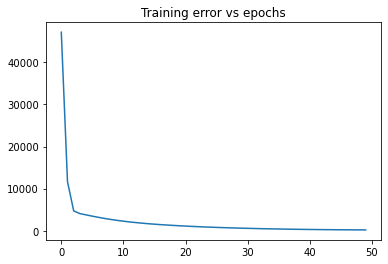

In [6]:
# model defined in step A0
model = regression_model()

# train model
history = model.fit(xtrain, ytrain, epochs=50, verbose=0)

# plot the loss function
plt.plot(history.history['loss'])
plt.title('Training error vs epochs')
plt.show()

#### A3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

In [7]:
# Method 1 (using keras)
mse = model.evaluate(xtest, ytest, verbose=0)
print('Validation error (using keras)  :', mse)

# Method 2 (using keras + sklearn)
ypred = model.predict(xtest)
mse = mean_squared_error(ypred, ytest)
print('Validation error (using sklearn):', mse)

Validation error (using keras)  : 216.38999938964844
Validation error (using sklearn): 216.3900296067976


#### A4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

In [8]:
# array to store values
MSE=np.zeros(50)

for i in range(50):
    
    # progress bar
    print('*',end='')
    
    # step 1: train-test-split
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)
    
    # step 2: training
    history = model.fit(xtrain, ytrain, epochs=50, verbose=0)
    
    # step 3: evaluation
    ypred = model.predict(xtest)
    mse = mean_squared_error(ypred, ytest)
    MSE[i] = mse

# step 4: list of MSE's
MSE_A = MSE.copy()


**************************************************

#### A5. Report the mean and the standard deviation of the mean squared errors.

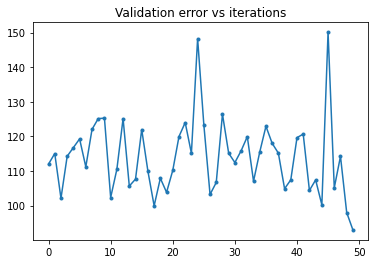

Mean validation error  : 114.03468110926741
Std of validation error: 10.806492159978085


In [9]:
def plot_error_log(MSE):
    
    plt.plot(MSE, '.-')
    plt.title('Validation error vs iterations')
    plt.show()
    
    print('Mean validation error  :', MSE.mean())
    print('Std of validation error:', MSE.std())
    
# step 5: mean and std of MSE's
plot_error_log(MSE_A)

# Part B

#### Normalize the data (5 marks) 

#### Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

#### How does the mean of the mean squared errors compare to that from Step A?


In [10]:
# Normalizing the data 
x_norm = (x-x.mean())/x.std()

***************************************************

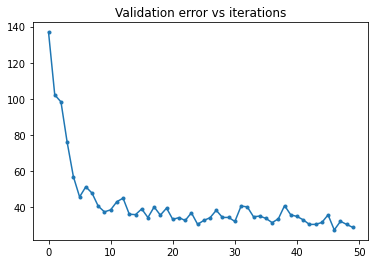

Mean validation error  : 41.60615331123248
Std of validation error: 19.993181471400632


In [11]:
# using the model defined in part A
model = regression_model()

# NOTE ON NUMBER OF ITERATIONS: 
# In part A we performed 1+50 iterations of 50 epochs each. 
# To keep the comparison fair, I will perform 51 iterations, 
# and drop the 1st iteration when I calculate mean and std of errors

MSE=np.zeros(51)

for i in range (51):
    
    # progress bar
    print('*',end='')
    
    # step 1: splitting (using normalized data)
    xtrain, xtest, ytrain, ytest = train_test_split(x_norm, y, test_size=0.3)
    
    # step 2: training
    model.fit(xtrain, ytrain, epochs=50, verbose=0)
    
    # step 3: evaluation
    ypred = model.predict(xtest)
    mse = mean_squared_error(ypred, ytest)
    MSE[i] = mse
    
# step 4: list of mean squared errors
MSE_B = MSE.copy()

# step 5: mean and std of MSE's (drop the 1st iteration)
plot_error_log(MSE_B[1:])

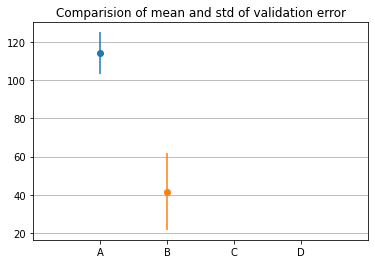

In [21]:
# step 6: Comparison of mean MSE

def plot_comparison():
    plt.xticks([1,2,3,4],['A','B','C','D'])
    plt.title('Comparision of mean and std of validation error')
    plt.xlim([0,5])
    plt.grid(axis='y')
    plt.errorbar(x=[1],y=np.mean(MSE_A[1:]), yerr=np.std(MSE_A[1:]), marker='o')
    plt.errorbar(x=[2],y=np.mean(MSE_B[1:]), yerr=np.std(MSE_B[1:]), marker='o')
    
plot_comparison()
plt.show()

# Part C

#### Increase the number of epochs (5 marks)

#### Repeat Part B but use 100 epochs this time for training.

#### How does the mean of the mean squared errors compare to that from Step B?

***************************************************

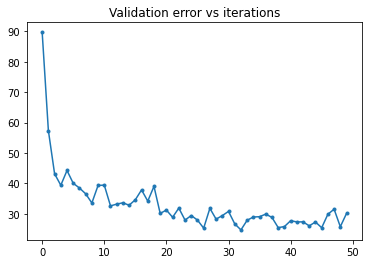

Mean validation error  : 33.13566401526
Std of validation error: 10.122132798895253


In [13]:
# using the model defined in part A
model = regression_model()

# NOTE ON NUMBER OF ITERATIONS: 
# In part A we performed 1+50 iterations of 50 epochs each. 
# To keep the comparison fair, I will perform 51 iterations, 
# and drop the 1st iteration when I calculate mean and std of errors

MSE=np.zeros(51)

for i in range (51):
    
    # progress bar
    print('*',end='')
    
    # step 1: splitting (using normalized data)
    xtrain, xtest, ytrain, ytest = train_test_split(x_norm, y, test_size=0.3)
    
    # step 2: training (using 100 epochs)
    model.fit(xtrain, ytrain, epochs=100, verbose=0)
    
    # step 3: evaluation
    ypred = model.predict(xtest)
    mse = mean_squared_error(ypred, ytest)
    MSE[i] = mse

# step 4: list of MSE's
MSE_C = MSE.copy()

#5: step mean and std of MSE's (drop the 1st iteration)
plot_error_log(MSE_C[1:])

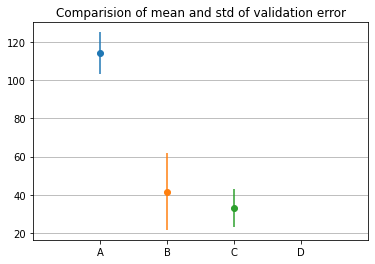

In [22]:
# step 6: Comparison of mean MSE for each model

plot_comparison()
plt.errorbar(x=[3],y=np.mean(MSE_C[1:]), yerr=np.std(MSE_C[1:]), marker='o')
plt.show()

# Part D

#### Increase the number of hidden layers (5 marks)

#### Repeat part B but use a neural network with the following instead:

#### Three hidden layers, each of 10 nodes and ReLU activation function.

#### How does the mean of the mean squared errors compare to that from Step B?

In [15]:
# Building the model

def regression_model2():
    model = Sequential()
    
    model.add(Input(shape=(num_inputs,)))     # input layer
    model.add(Dense(10, activation='relu'))   # hidden layer 1
    model.add(Dense(10, activation='relu'))   # hidden layer 2
    model.add(Dense(10, activation='relu'))   # hidden layer 3
    model.add(Dense(1))                       # output layer
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
    
model = regression_model2()


***************************************************

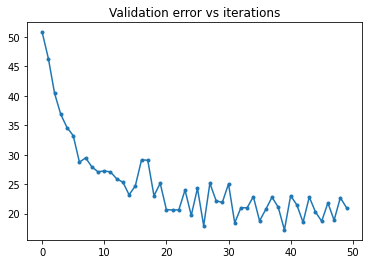

Mean validation error  : 25.015472057329795
Std of validation error: 6.8142390590733335


In [16]:
# NOTE ON NUMBER OF ITERATIONS: 
# In part A we performed 1+50 iterations of 50 epochs each. 
# To keep the comparison fair, I will perform 51 iterations, 
# and drop the 1st iteration when I calculate mean and std of errors

MSE=np.zeros(51)

for i in range (51):
    
    # progess bar
    print('*',end='')
    
    # step 1: splitting (using normalized data)
    xtrain, xtest, ytrain, ytest = train_test_split(x_norm, y, test_size=0.3)
    
    # step 2: training
    model.fit(xtrain, ytrain, epochs=50, verbose=0)
    
    # step 3: evaluation
    ypred = model.predict(xtest)
    mse = mean_squared_error(ypred, ytest)
    MSE[i] = mse
    
# step 4: list of MSE's
MSE_D = MSE.copy()

#5: step mean and std of MSE's (drop the 1st iteration)
plot_error_log(MSE_D[1:])

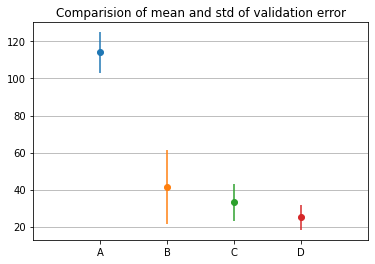

In [23]:
# step 6: Comparison of mean MSE for each model

plot_comparison()
plt.errorbar(x=[3],y=np.mean(MSE_C[1:]), yerr=np.std(MSE_C[1:]), marker='o')
plt.errorbar(x=[4],y=np.mean(MSE_D[1:]), yerr=np.std(MSE_D[1:]), marker='o')
plt.show()